In [1]:
import xarray as xr

In [2]:
with xr.open_dataset("../../test_data/CPEXAW-DROPSONDE_D20210806_193025_PQC.nc", decode_cf=False) as ds:
        print(ds.data_vars)
        print("----------")
        for key in ds.attrs:
                print(key)

Data variables:
    trajectory      |S1 ...
    launch_time     int32 ...
    pres            (time) float32 ...
    tdry            (time) float32 ...
    dp              (time) float32 ...
    rh              (time) float32 ...
    u_wind          (time) float32 ...
    v_wind          (time) float32 ...
    w_wind          (time) float32 ...
    wspd            (time) float32 ...
    wdir            (time) float32 ...
    dz              (time) float32 ...
    mr              (time) float32 ...
    vt              (time) float32 ...
    theta           (time) float32 ...
    theta_e         (time) float32 ...
    theta_v         (time) float32 ...
    lat             (time) float32 ...
    lon             (time) float32 ...
    alt             (time) float32 ...
    gpsalt          (time) float32 ...
    reference_time  (obs) int32 ...
    reference_pres  (obs) float32 ...
    reference_tdry  (obs) float32 ...
    reference_rh    (obs) float32 ...
    reference_wspd  (obs) float32 .

In [3]:
with xr.open_dataset("../../test_data/CPEXAW-DROPSONDE_D20210820_203208_PQC.nc", decode_cf=False) as ds:
        rh = ds['rh'].values # relative humidity
        dp = ds['dp'].values # dew point
        tdry = ds['tdry'].values # temp dry???
        lat = ds['lat'].values
        lon = ds['lon'].values
        alt = ds['alt'].values
        time = ds['time'].values

        print(len(rh), "-", (rh.shape)) #np ndarray
        print(len(dp), "-", (dp.shape)) 
        print(len(tdry), "-", (tdry.shape)) 
        print(len(lat), "-", (lat.shape))
        print(len(lon), "-", (lon.shape))
        print(len(alt), "-", (alt.shape))   
        print(len(time), "-", (time.shape)) 

        # print(time, len(time)) 
        print(lat[123])
        print(lon[123])
        print(alt[123])   


2979 - (2979,)
2979 - (2979,)
2979 - (2979,)
2979 - (2979,)
2979 - (2979,)
2979 - (2979,)
2979 - (2979,)
-999.0
-999.0
-999.0


netcdf to zarr

In [61]:
import numpy as np
import xarray as xr

def main():
    """
    Converts Level 1B crs data from s3 to zarr file and then stores it in the provided folder
    Args:
        folder (string): name to hold the raw files.
        file (string): the s3 url to the raw file.
    """

    # open dataset.
    with xr.open_dataset("../../test_data/CPEXAW-DROPSONDE_D20210820_203208_PQC.nc", decode_cf=False) as ds:
        rh = ds['rh'].values # relative humidity
        dp = ds['dp'].values # dew point
        tdry = ds['tdry'].values # temp dry???
        lat = ds['lat'].values
        lon = ds['lon'].values
        alt = ds['alt'].values
        time = ds['time'].values

    # data formation
    
    # sort data by time
    sort_idx = np.argsort(time)

    lon = lon[sort_idx]
    lat = lat[sort_idx]
    alt = alt[sort_idx]
    time = time[sort_idx]
    rh = rh[sort_idx]
    dp = dp[sort_idx]
    tdry = tdry[sort_idx]

    # remove nan and infinite using mask ???
    mask = np.logical_and(alt != -999.0, lon != -999.0, lat != -999.0)
    # mask = np.logical_and(np.isfinite(ref), alt > 0, alt != -999.0, lon != -999.0, lat != -999.0)
    lon = lon[mask]
    lat = lat[mask]
    alt = alt[mask]
    time = time[mask]
    rh = rh[mask]
    dp = dp[mask]
    tdry = tdry[mask]

    # remove nan and infinite using mask ???
    mask = np.logical_and(rh > -100, rh > -100)
    # mask = np.logical_and(np.isfinite(ref), alt > 0, alt != -999.0, lon != -999.0, lat != -999.0)
    lon = lon[mask]
    lat = lat[mask]
    alt = alt[mask]
    time = time[mask]
    rh = rh[mask]
    dp = dp[mask]
    tdry = tdry[mask]

    return (lon, lat, alt, time, rh, dp, tdry)    

In [62]:
(lon, lat, alt, time, rh, dp, tdry) = main()

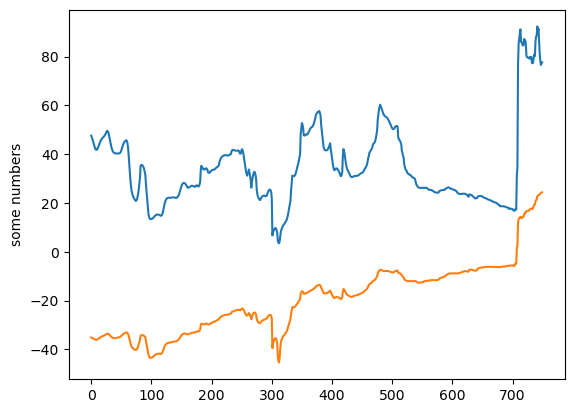

In [64]:
import matplotlib.pyplot as plt
# plt.plot(lon)
# plt.plot(lat)

# plt.ylim([0, np.max(alt)/100])

plt.plot(rh)
plt.plot(dp)
# plt.plot(tdry)

plt.ylabel('some numbers')
plt.show()

In [39]:
np.max(alt)

9523.512